In [1]:
# importing libraries and settings of formatting
from scipy.io import arff
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.api import OLS
import statsmodels.api as sm

# turning off warnings
warnings.filterwarnings('error')
warnings.filterwarnings("ignore")

# display settings
def adaptive_format(x):
    if x % 1 == 0:
        return f"{x:.0f}"
    else:
        return f"{x:.7f}"

pd.set_option('display.float_format', lambda x: adaptive_format(x))

# Unsupervised learning

In [2]:
# Dataset
# https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised

In [3]:
# Loading dataset
df2 = pd.read_csv('Customer Data.csv')

# Drop ID variable 
df2 = df2.drop('CUST_ID', axis=1)

### EDA

In [4]:
df2.shape

(8950, 17)

In [5]:
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.9007490,0.8181820,95.4000000,0,95.4000000,0,0.1666670,0,0.0833330,0,0,2,1000,201.8020840,139.5097870,0,12
1,3202.4674160,0.9090910,0,0,0,6442.9454830,0,0,0,0.2500000,4,0,7000,4103.0325970,1072.3402170,0.2222220,12
2,2495.1488620,1,773.1700000,773.1700000,0,0,1,1,0,0,0,12,7500,622.0667420,627.2847870,0,12
3,1666.6705420,0.6363640,1499,1499,0,205.7880170,0.0833330,0.0833330,0,0.0833330,1,1,7500,0,NaN,0,12
4,817.7143350,1,16,16,0,0,0.0833330,0.0833330,0,0,0,1,1200,678.3347630,244.7912370,0,12


In [6]:
description = df2.describe()
null_counts = df2.isnull().sum().rename('null')
extended_description = pd.concat([description, null_counts.to_frame().T], ignore_index=False)
pd.options.display.float_format = '{:.2f}'.format
extended_description

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.63,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,169.12,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00
null,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,313.00,0.00,0.00


In [7]:
extended_description.to_csv('descr1.csv')

As we can see from this table, we have several empty values here - 1 in CREDIT_LIMIT and 313 in MINIMUM_PAYMENTS

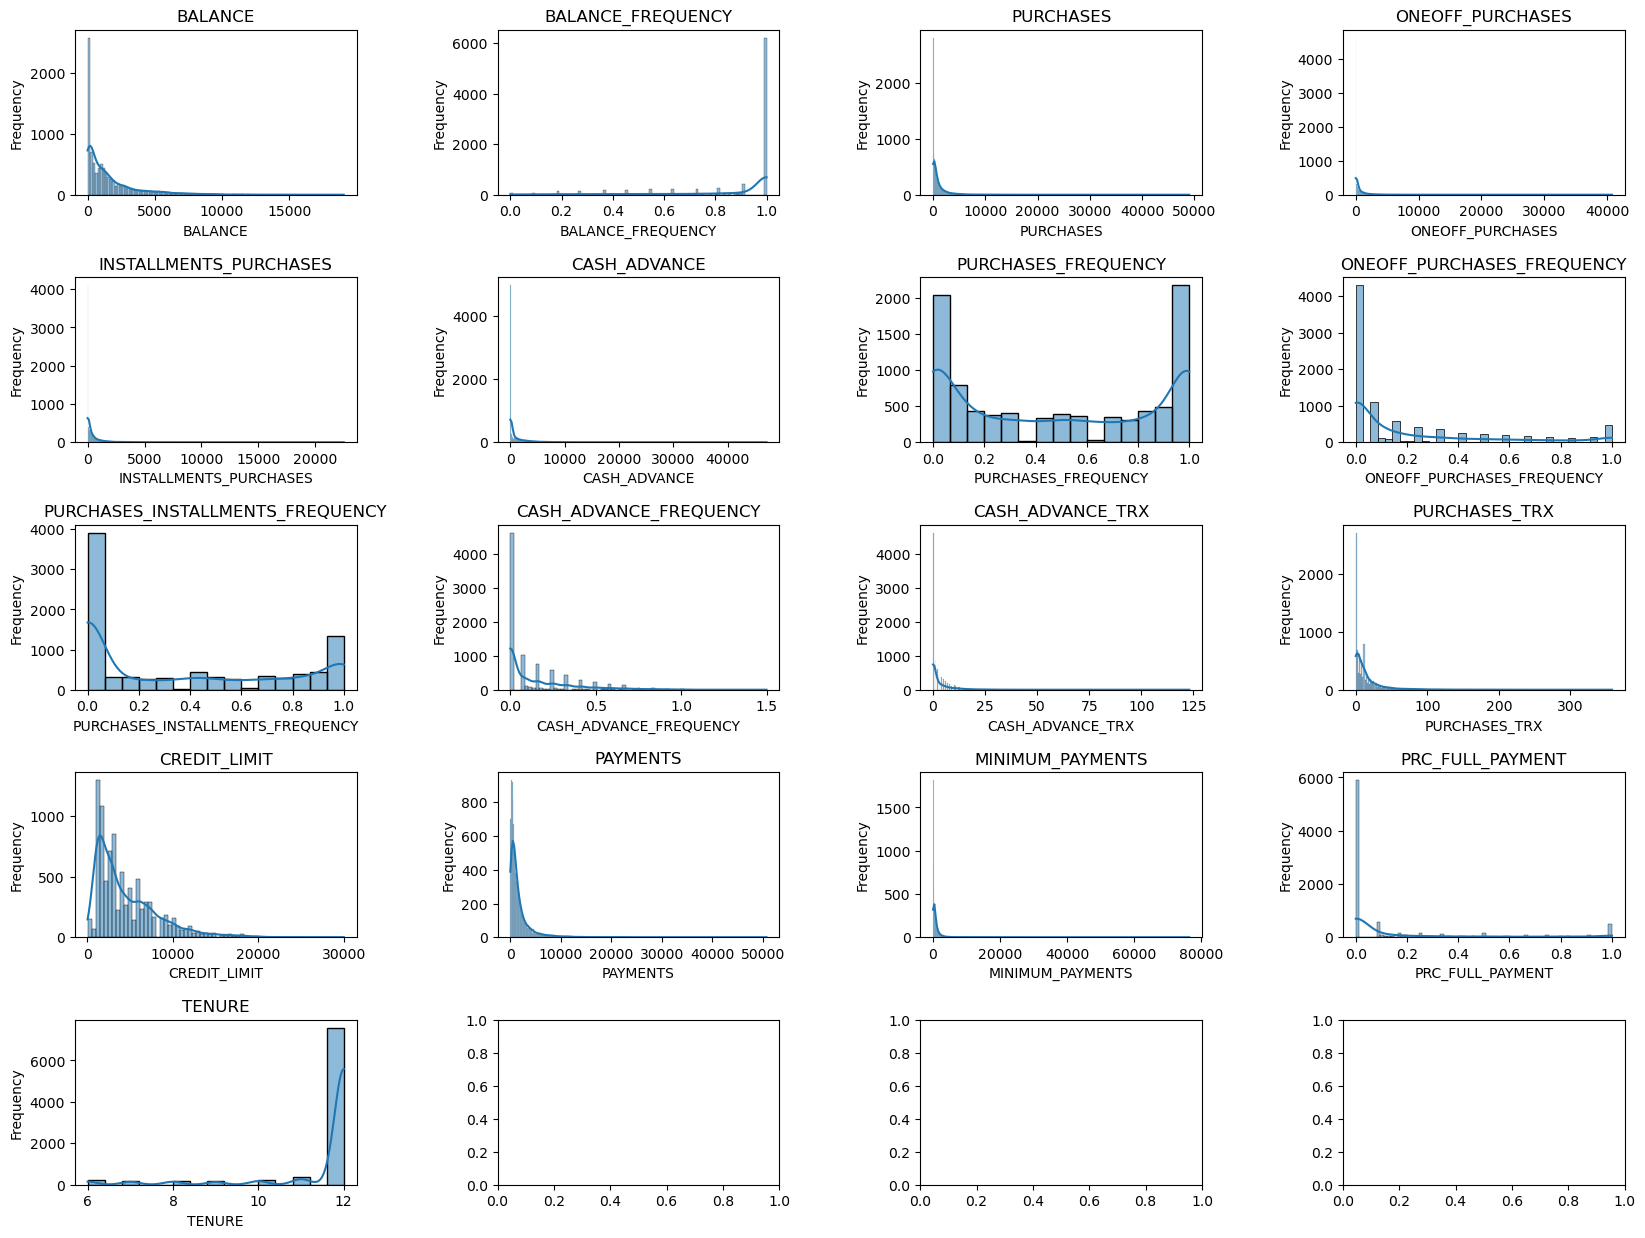

In [8]:
# Visualising distribution of variables
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for ax, column in zip(axes.flatten(), df2.columns):
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Frequency')

plt.show()

### Clearing data and filling  missing values

In [9]:
df2['MINIMUM_PAYMENTS'] = df2['MINIMUM_PAYMENTS'].fillna(df2['MINIMUM_PAYMENTS'].mean())
df2['CREDIT_LIMIT'] = df2['CREDIT_LIMIT'].fillna(df2['CREDIT_LIMIT'].mean())

In [10]:
for i in df2.columns:
    print(i, df2[i].isna().sum())

BALANCE 0
BALANCE_FREQUENCY 0
PURCHASES 0
ONEOFF_PURCHASES 0
INSTALLMENTS_PURCHASES 0
CASH_ADVANCE 0
PURCHASES_FREQUENCY 0
ONEOFF_PURCHASES_FREQUENCY 0
PURCHASES_INSTALLMENTS_FREQUENCY 0
CASH_ADVANCE_FREQUENCY 0
CASH_ADVANCE_TRX 0
PURCHASES_TRX 0
CREDIT_LIMIT 0
PAYMENTS 0
MINIMUM_PAYMENTS 0
PRC_FULL_PAYMENT 0
TENURE 0


Now we don't have missing values

### Standartization 

We need to scale our data to improve perfomance of the model

In [11]:
# Standartization
scaler2 = StandardScaler()
df2_scaled = scaler2.fit_transform(df2)

### PCA

In [12]:
# Reducing with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df2_scaled)

### Finding best number of clusters with Elbow method

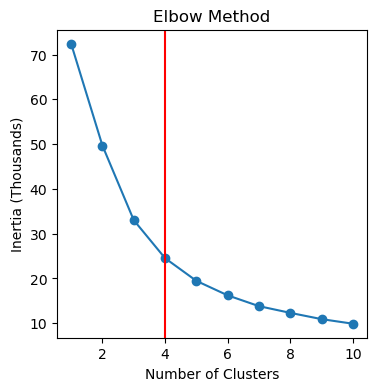

In [13]:


# Finding optimal number of clusters with elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_/1000)

# Visualisation
plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Thousands)')
plt.title('Elbow Method')

# Showing elbow points

plt.axvline(x=4, color='r', linestyle='-', label='Cluster 4')

plt.show()

### K-means

In [14]:
# We found optimal number of clusters 
optimal_clusters = 4

# Clusterization with k-means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=47)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

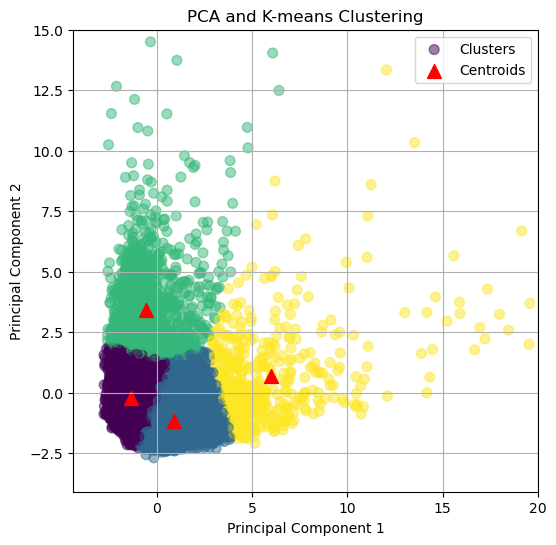

In [15]:
# Visualisation

plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5, label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='red', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering')
plt.xlim([plt.xlim()[0], 20])
plt.ylim([plt.ylim()[0], 15])
plt.legend()
plt.grid(True)
plt.show()

### Assessing Clusterization

Before we start to interpret our results, we need to assess our model

In [16]:
# Adding Cluster labels to dataset
df2['Cluster'] = clusters

Let's start with silhouette score, which shows how similar an object is to its own cluster compared to other clusters, indicating the quality of clustering.

In [17]:
from sklearn.metrics import silhouette_score

# Calculating silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Average silhouette score: {silhouette_avg}')

Average silhouette score: 0.4076682860548482


We get enough acceptable score

Now let's go to the Kruskal Wallis H test, which shows if there are statistically significant difference between the medians of groups (cluster)

In [18]:
from scipy.stats import kruskal

results = []

for column in df2.columns[:-1]:  
    groups = [group[column].values for name, group in df2.groupby('Cluster')]
    test_stat, p_value = kruskal(*groups)
    results.append({'Variable': column, 'Test Statistic': test_stat, 'p-value': p_value})

results_df = pd.DataFrame(results)

print(results_df)

                            Variable  Test Statistic  p-value
0                            BALANCE         2613.13     0.00
1                  BALANCE_FREQUENCY          667.20     0.00
2                          PURCHASES         4552.34     0.00
3                   ONEOFF_PURCHASES         1839.13     0.00
4             INSTALLMENTS_PURCHASES         4192.68     0.00
5                       CASH_ADVANCE         3995.10     0.00
6                PURCHASES_FREQUENCY         5699.16     0.00
7         ONEOFF_PURCHASES_FREQUENCY         1754.62     0.00
8   PURCHASES_INSTALLMENTS_FREQUENCY         4323.31     0.00
9             CASH_ADVANCE_FREQUENCY         3814.19     0.00
10                  CASH_ADVANCE_TRX         3882.08     0.00
11                     PURCHASES_TRX         5612.72     0.00
12                      CREDIT_LIMIT         2131.89     0.00
13                          PAYMENTS         2499.31     0.00
14                  MINIMUM_PAYMENTS         1879.49     0.00
15      

As we can see from this table, there are statistically significant differences between cluster.

Now we can see interpretation of results, as they are statistically significant and has good metrics

### Interpetation

Description of every cluster provided in report

In [19]:
# Analyzing obtained clusters
cluster_summary = df2.groupby('Cluster').mean()

print(cluster_summary)

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                            
0        1014.71               0.80     222.98            157.50   
1         823.93               0.92    1236.28            621.64   
2        4508.59               0.96     462.91            300.37   
3        3401.84               0.99    6894.61           4511.89   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                         65.81        615.08                 0.19   
1                        614.85        147.40                 0.86   
2                        162.65       4403.48                 0.27   
3                       2383.92        773.15                 0.95   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                       

# Regression task

In [20]:
# https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction/data

df = pd.read_csv('medical_insurance.csv')

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
2767,47,female,45.32,1,no,southeast,8569.86
2768,21,female,34.60,0,no,southwest,2020.18
2769,19,male,26.03,1,yes,northwest,16450.89
2770,23,male,18.71,0,no,northwest,21595.38


### Explanatory Data Analysis

In [22]:
description = df.describe()
null_counts = df.isnull().sum().rename('null')
extended_description = pd.concat([description, null_counts.to_frame().T], ignore_index=False)
pd.options.display.float_format = '{:.2f}'.format
extended_description

,age,bmi,children,charges,sex,smoker,region
count,2772.00,2772.00,2772.00,2772.00,NaN,NaN,NaN
mean,39.11,30.70,1.10,13261.37,NaN,NaN,NaN
std,14.08,6.13,1.21,12151.77,NaN,NaN,NaN
min,18.00,15.96,0.00,1121.87,NaN,NaN,NaN
25%,26.00,26.22,0.00,4687.80,NaN,NaN,NaN
50%,39.00,30.45,1.00,9333.01,NaN,NaN,NaN
75%,51.00,34.77,2.00,16577.78,NaN,NaN,NaN
max,64.00,53.13,5.00,63770.43,NaN,NaN,NaN
null,0.00,0.00,0.00,0.00,0.00,0.00,0.00


We have no Nan values

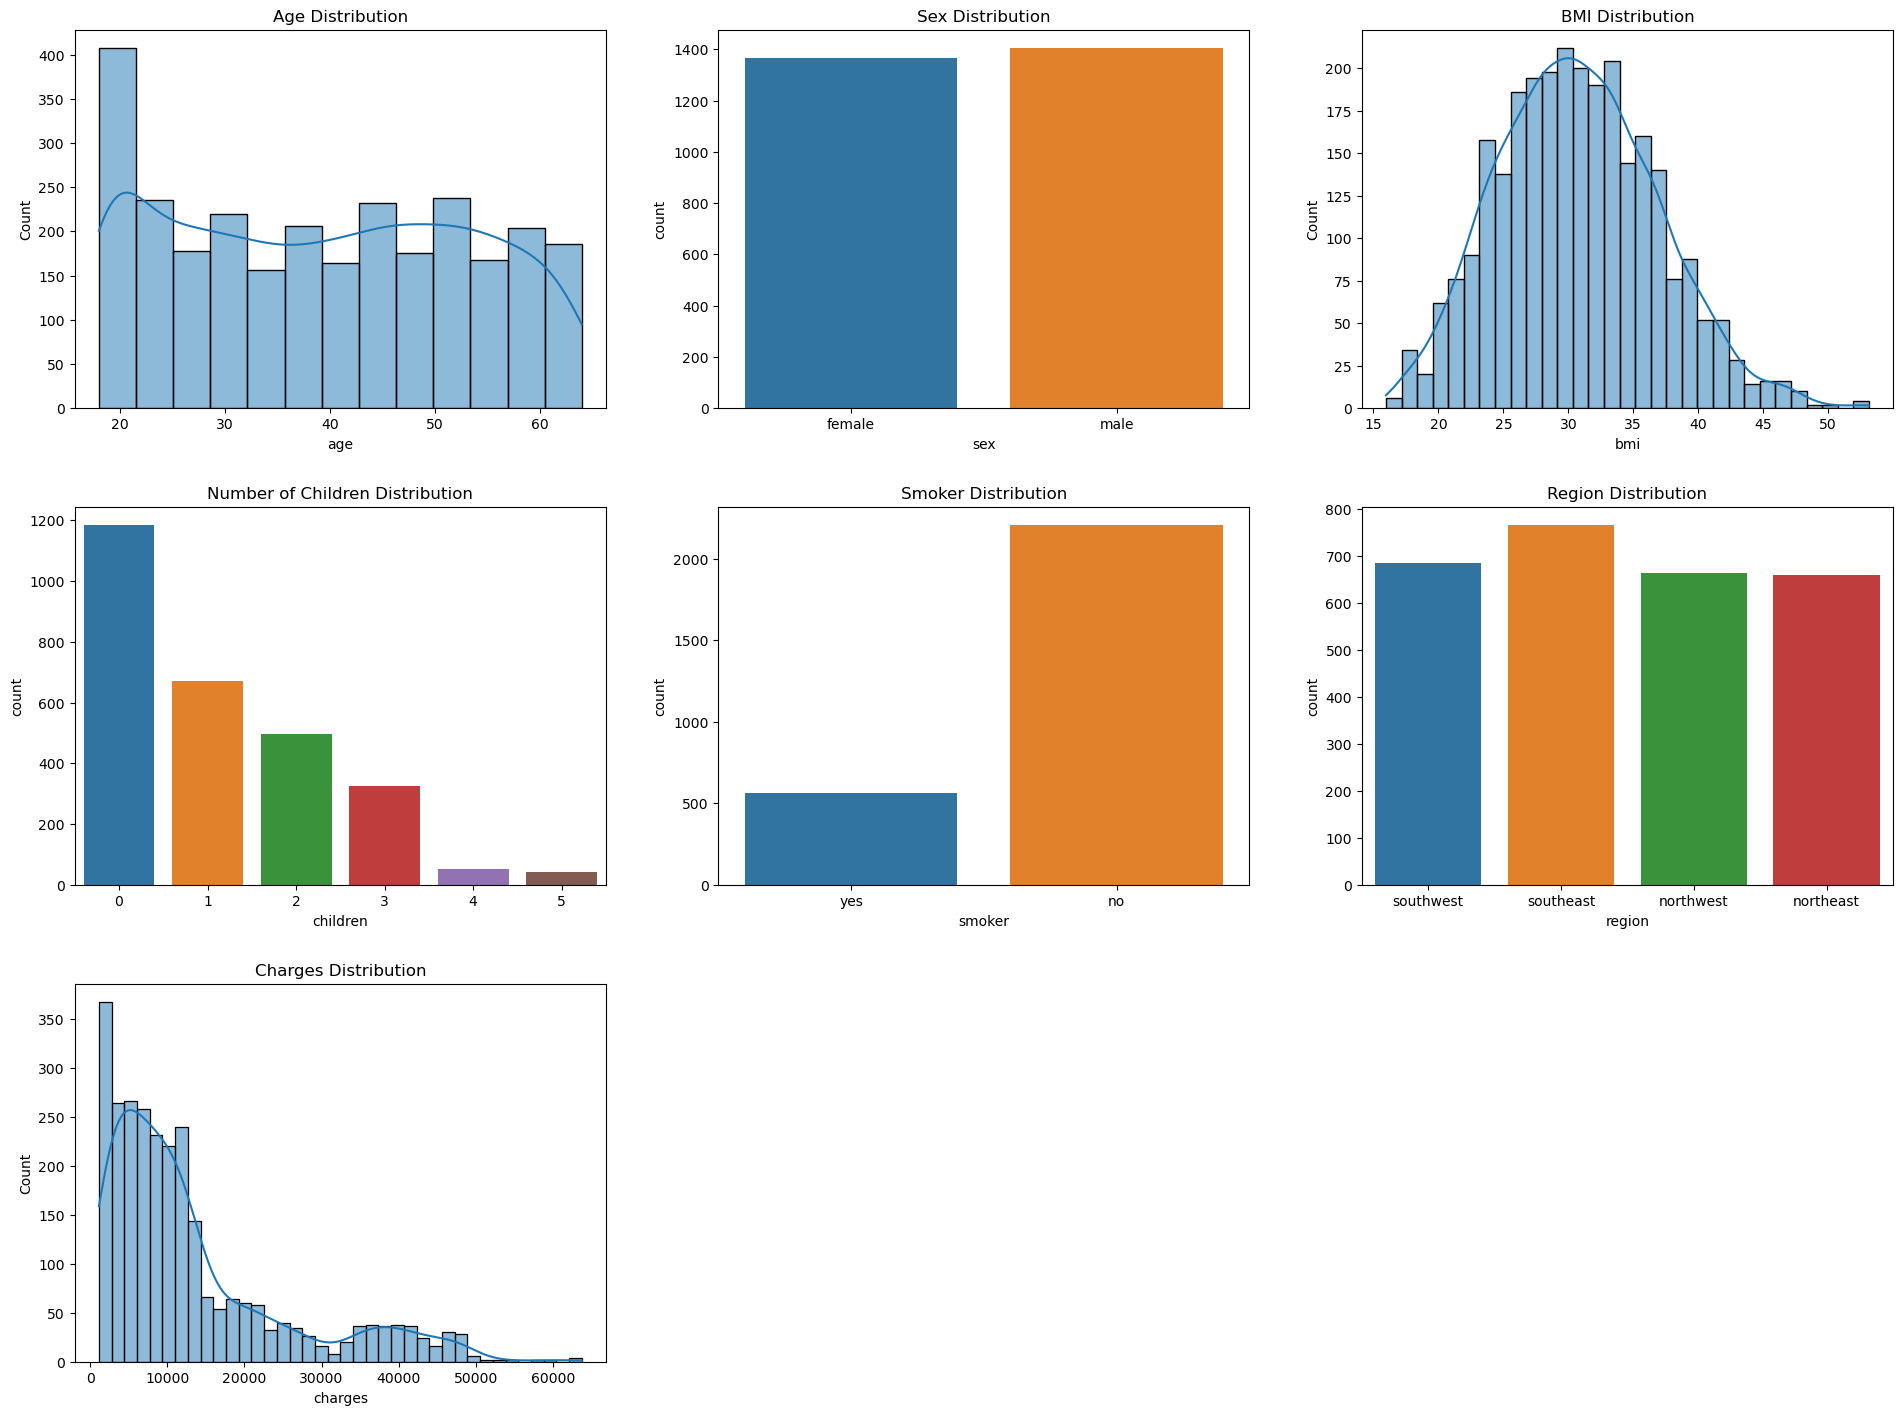

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.tight_layout(pad=5.0)

sns.histplot(df['age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.countplot(x='sex', data=df, ax=axes[0, 1]).set_title('Sex Distribution')
sns.histplot(df['bmi'], kde=True, ax=axes[0, 2]).set_title('BMI Distribution')
sns.countplot(x='children', data=df, ax=axes[1, 0]).set_title('Number of Children Distribution')
sns.countplot(x='smoker', data=df, ax=axes[1, 1]).set_title('Smoker Distribution')
sns.countplot(x='region', data=df, ax=axes[1, 2]).set_title('Region Distribution')
sns.histplot(df['charges'], kde=True, ax=axes[2, 0]).set_title('Charges Distribution')

for i in [1, 2]:
    axes[2, i].set_visible(False)

plt.show()

From this we can see that there are no anomalies in our data

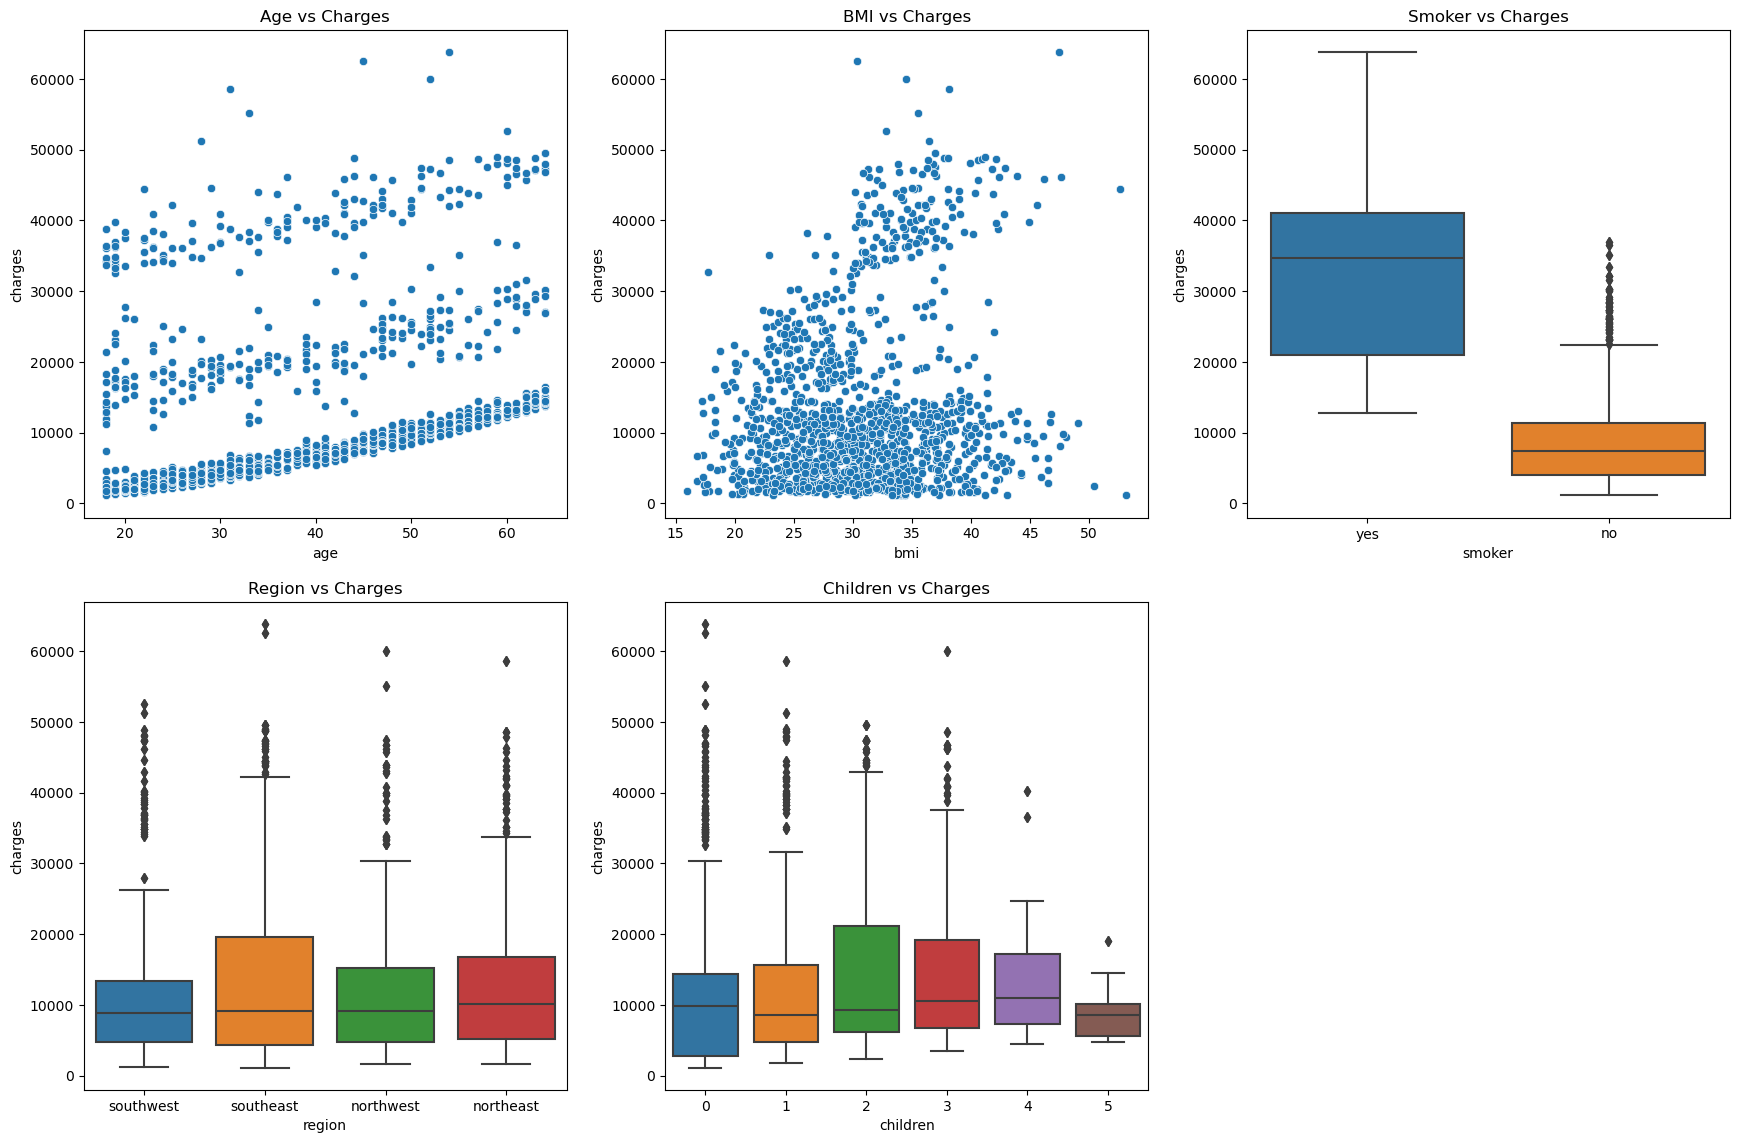

In [24]:
# Finding functional dependencies
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.tight_layout(pad=4.0)

sns.scatterplot(x=df['age'], y='charges', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Charges')

sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Charges')

sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Smoker vs Charges')

sns.boxplot(x='region', y='charges', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Region vs Charges')

sns.boxplot(x='children', y='charges', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Children vs Charges')

axes[1, 2].set_visible(False)

plt.show()

In [25]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True, dtype='int')  

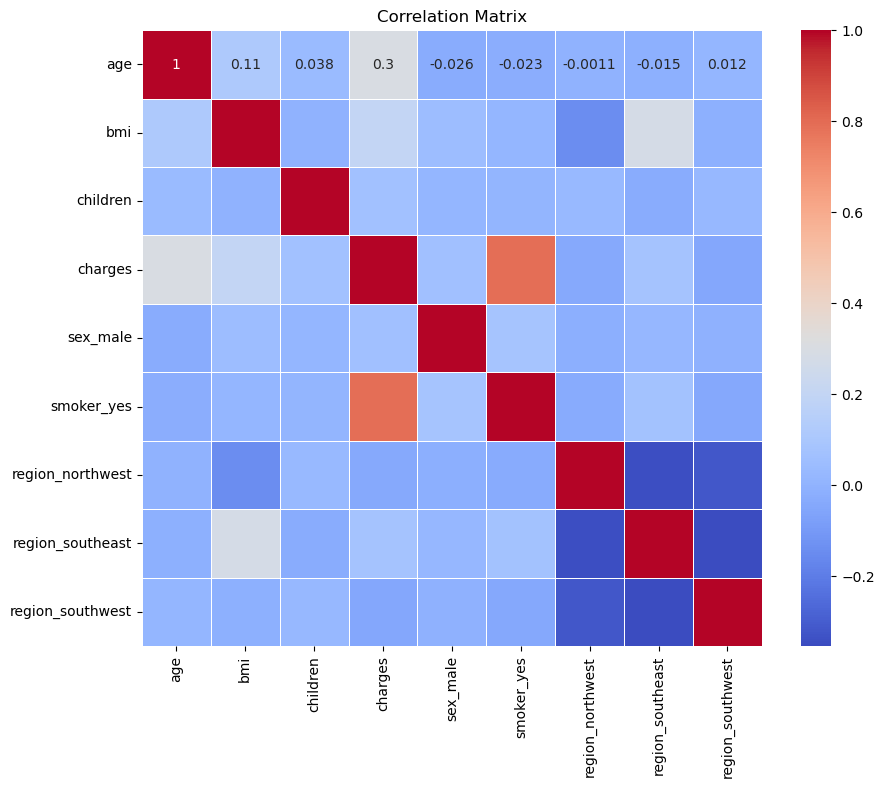

In [26]:
quantitative_vars = df_encoded
correlation_matrix = quantitative_vars.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Data preparation

We have categorical values so we need to code them and scale our data

Also we need to assess our model, so we will make train and test samples

In [27]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)  
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,False,True,False,False,True
1,18,33.77,1,1725.55,True,False,False,True,False
2,28,33.00,3,4449.46,True,False,False,True,False
3,33,22.70,0,21984.47,True,False,True,False,False
4,32,28.88,0,3866.86,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
2767,47,45.32,1,8569.86,False,False,False,True,False
2768,21,34.60,0,2020.18,False,False,False,False,True
2769,19,26.03,1,16450.89,True,True,True,False,False
2770,23,18.71,0,21595.38,True,False,True,False,False


In [28]:
X = df_encoded.drop('charges', axis=1)  # independent variables
y = df_encoded['charges']  # dependent variables

In [29]:
# Splitting into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Normalisation
scaler = StandardScaler()

columns = X_train.columns

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns, index=X_test.index)

### Building models

In [31]:
# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

In [32]:
# Linear regression with variable transformation
X_train_sq = X_train_scaled_df.copy()
X_test_sq = X_test_scaled_df.copy()

X_train_sq['age^2'] = X_train_sq['age']**2
X_train_sq['bmi^2'] = X_train_sq['bmi']**2
X_train_sq['children^2'] = X_train_sq['children']**2

X_test_sq['age^2'] = X_test_sq['age']**2
X_test_sq['bmi^2'] = X_test_sq['bmi']**2
X_test_sq['children^2'] = X_test_sq['children']**2

sq_reg = LinearRegression()
sq_reg.fit(X_train_sq, y_train)

y_pred_sq = sq_reg.predict(X_test_sq)

In [33]:
# Random forest regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [34]:
# Linear regression with partial poly
continuous_features = ['age', 'bmi', 'children']
dummy_features = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_continuous_poly = poly.fit_transform(X_train_scaled_df[continuous_features])
X_test_continuous_poly = poly.transform(X_test_scaled_df[continuous_features])

poly_feature_names = poly.get_feature_names_out(continuous_features)

X_train_continuous_poly_df = pd.DataFrame(X_train_continuous_poly, columns=poly_feature_names, index=X_train.index)
X_test_continuous_poly_df = pd.DataFrame(X_test_continuous_poly, columns=poly_feature_names, index=X_test.index)

X_train_poly_with_dummies = pd.concat([X_train_continuous_poly_df, X_train_scaled_df[dummy_features]], axis=1)
X_test_poly_with_dummies = pd.concat([X_test_continuous_poly_df, X_test_scaled_df[dummy_features]], axis=1)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_with_dummies, y_train)

y_pred_poly = poly_reg.predict(X_test_poly_with_dummies)

In [35]:
# Polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train_scaled_df)
X_poly_test = poly_features.transform(X_test_scaled)

poly_reg2 = LinearRegression()
poly_reg2.fit(X_poly_train, y_train)
y_pred_poly2 = poly_reg2.predict(X_poly_test)

In [36]:
# Ridge regression
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

In [37]:
# Lasso regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

### Assessing models

In [38]:
# Assessing models
from sklearn.metrics import r2_score

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin}")
print(f"Linear Regression R^2: {r2_lin}")

mse_sq = mean_squared_error(y_test, y_pred_sq)
r2_sq = r2_score(y_test, y_pred_sq)
print(f"Trans Regression MSE: {mse_sq}")
print(f"Trans Regression R^2: {r2_sq}")

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"Random Forest Regressor R^2: {r2_rf}")

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Linear regression with partial poly MSE: {mse_poly}")
print(f"Linear regression with partial poly transformation R^2: {r2_poly}")

mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)
print(f"Polynomial Regression MSE: {mse_poly2}")
print(f"Polynomial Regression R^2: {r2_poly2}")

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Linear Regression MSE: 39933194.54805147
Linear Regression R^2: 0.73981661775643
Trans Regression MSE: 39001973.55824823
Trans Regression R^2: 0.74588395670803
Random Forest Regressor MSE: 7566043.948864406
Random Forest Regressor R^2: 0.9507036958325416
Linear regression with partial poly MSE: 39215704.953494646
Linear regression with partial poly transformation R^2: 0.7444913970108604
Polynomial Regression MSE: 25157613.30703466
Polynomial Regression R^2: 0.836086418993506
Ridge Regression MSE: 39935330.427993745
Ridge Regression R^2: 0.7398027015027033
Lasso Regression MSE: 39933258.542003006
Lasso Regression R^2: 0.7398162008059972


The best model is Random Forest with the best R^2 and MSE

### Interpretation

Random forest

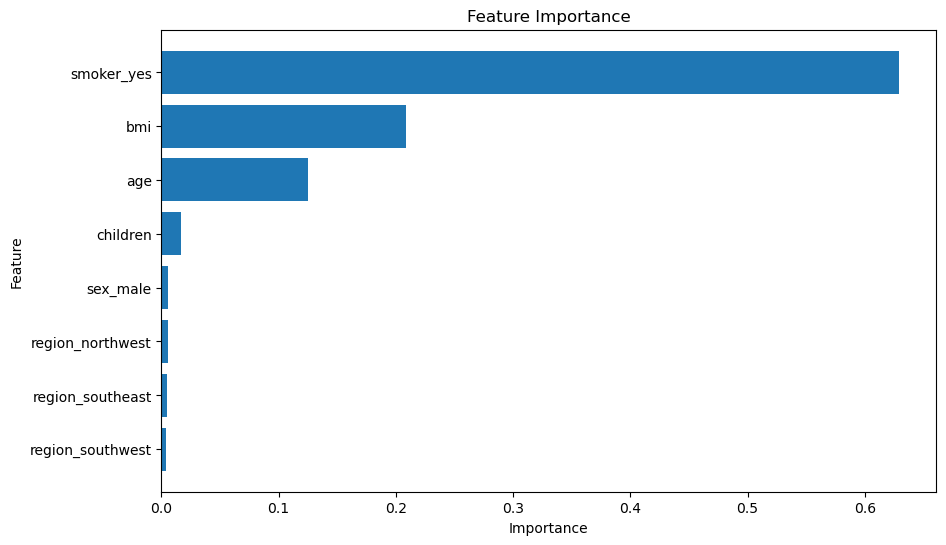

In [39]:
# Getting importance of features
feature_importances = random_forest_model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Random Forest model has good results and the best in terms of predictions, but not very good for interpritation, so we will prefer more interpretable model.

Polynomial Regession

In [40]:
# Coefficients of PolyReg
coefficients = poly_reg2.coef_
intercept = poly_reg2.intercept_

feature_names = poly_features.get_feature_names_out(input_features=X_train.columns)
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {coefficients[i]}")

age: 3574.305873343166
bmi: 1971.6332566524002
children: 907.1502516205327
sex_male: -44112910162991.766
smoker_yes: -7020502201296189.0
region_northwest: 781971109133956.5
region_southeast: -211035856994184.56
region_southwest: 3695792802332534.5
age^2: 759.5017693974518
age bmi: 61.96777326792515
age children: -104.22465778175558
age sex_male: 98.12684739855652
age smoker_yes: -100.46822408829439
age region_northwest: -74.98606500274055
age region_southeast: 229.45635285391927
age region_southwest: 191.44465719883334
bmi^2: -183.83452891458342
bmi children: 125.9814214989019
bmi sex_male: 53.68057366642554
bmi smoker_yes: 3636.392551736186
bmi region_northwest: -91.77722117978661
bmi region_southeast: -442.2234654675124
bmi region_southwest: -277.16758655048153
children^2: -111.97415668097476
children sex_male: -133.77227869454188
children smoker_yes: -180.6957338171086
children region_northwest: 34.43096601392599
children region_southeast: -231.41975933235372
children region_southwe

As we can see from here, this model has good predictive power, but big amount of combination of variables makes it very hard to interpret model

Polynomial Regression with variable transformation

In [41]:
X_train_sq_const = sm.add_constant(X_train_sq)
model = sm.OLS(y_train,X_train_sq_const).fit()

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     626.0
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:13:17   Log-Likelihood:                -22415.
No. Observations:                2217   AIC:                         4.485e+04
Df Residuals:                    2205   BIC:                         4.492e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.314e+04    235.766  

Talking about this model, it has quite good predictive power (R^2 is 0.757 what is very good). Also it is possible to interpet this model, so we will use it for question about influence of variables on price of medical insurance

# Classification 

In [42]:
#https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
# !pip install ucimlrepo

### Explanatiry data analysis

Variables description from source:
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [43]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# code from UCI repository to download dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
# print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables)           

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

As we can see from this table, we have no missing values in our dataset and besides target and ID variable all other variables are continious.

In [44]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [45]:
print(y['Diagnosis'].value_counts())

Diagnosis
B    357
M    212
Name: count, dtype: int64


There is no huge disbalance in target variable

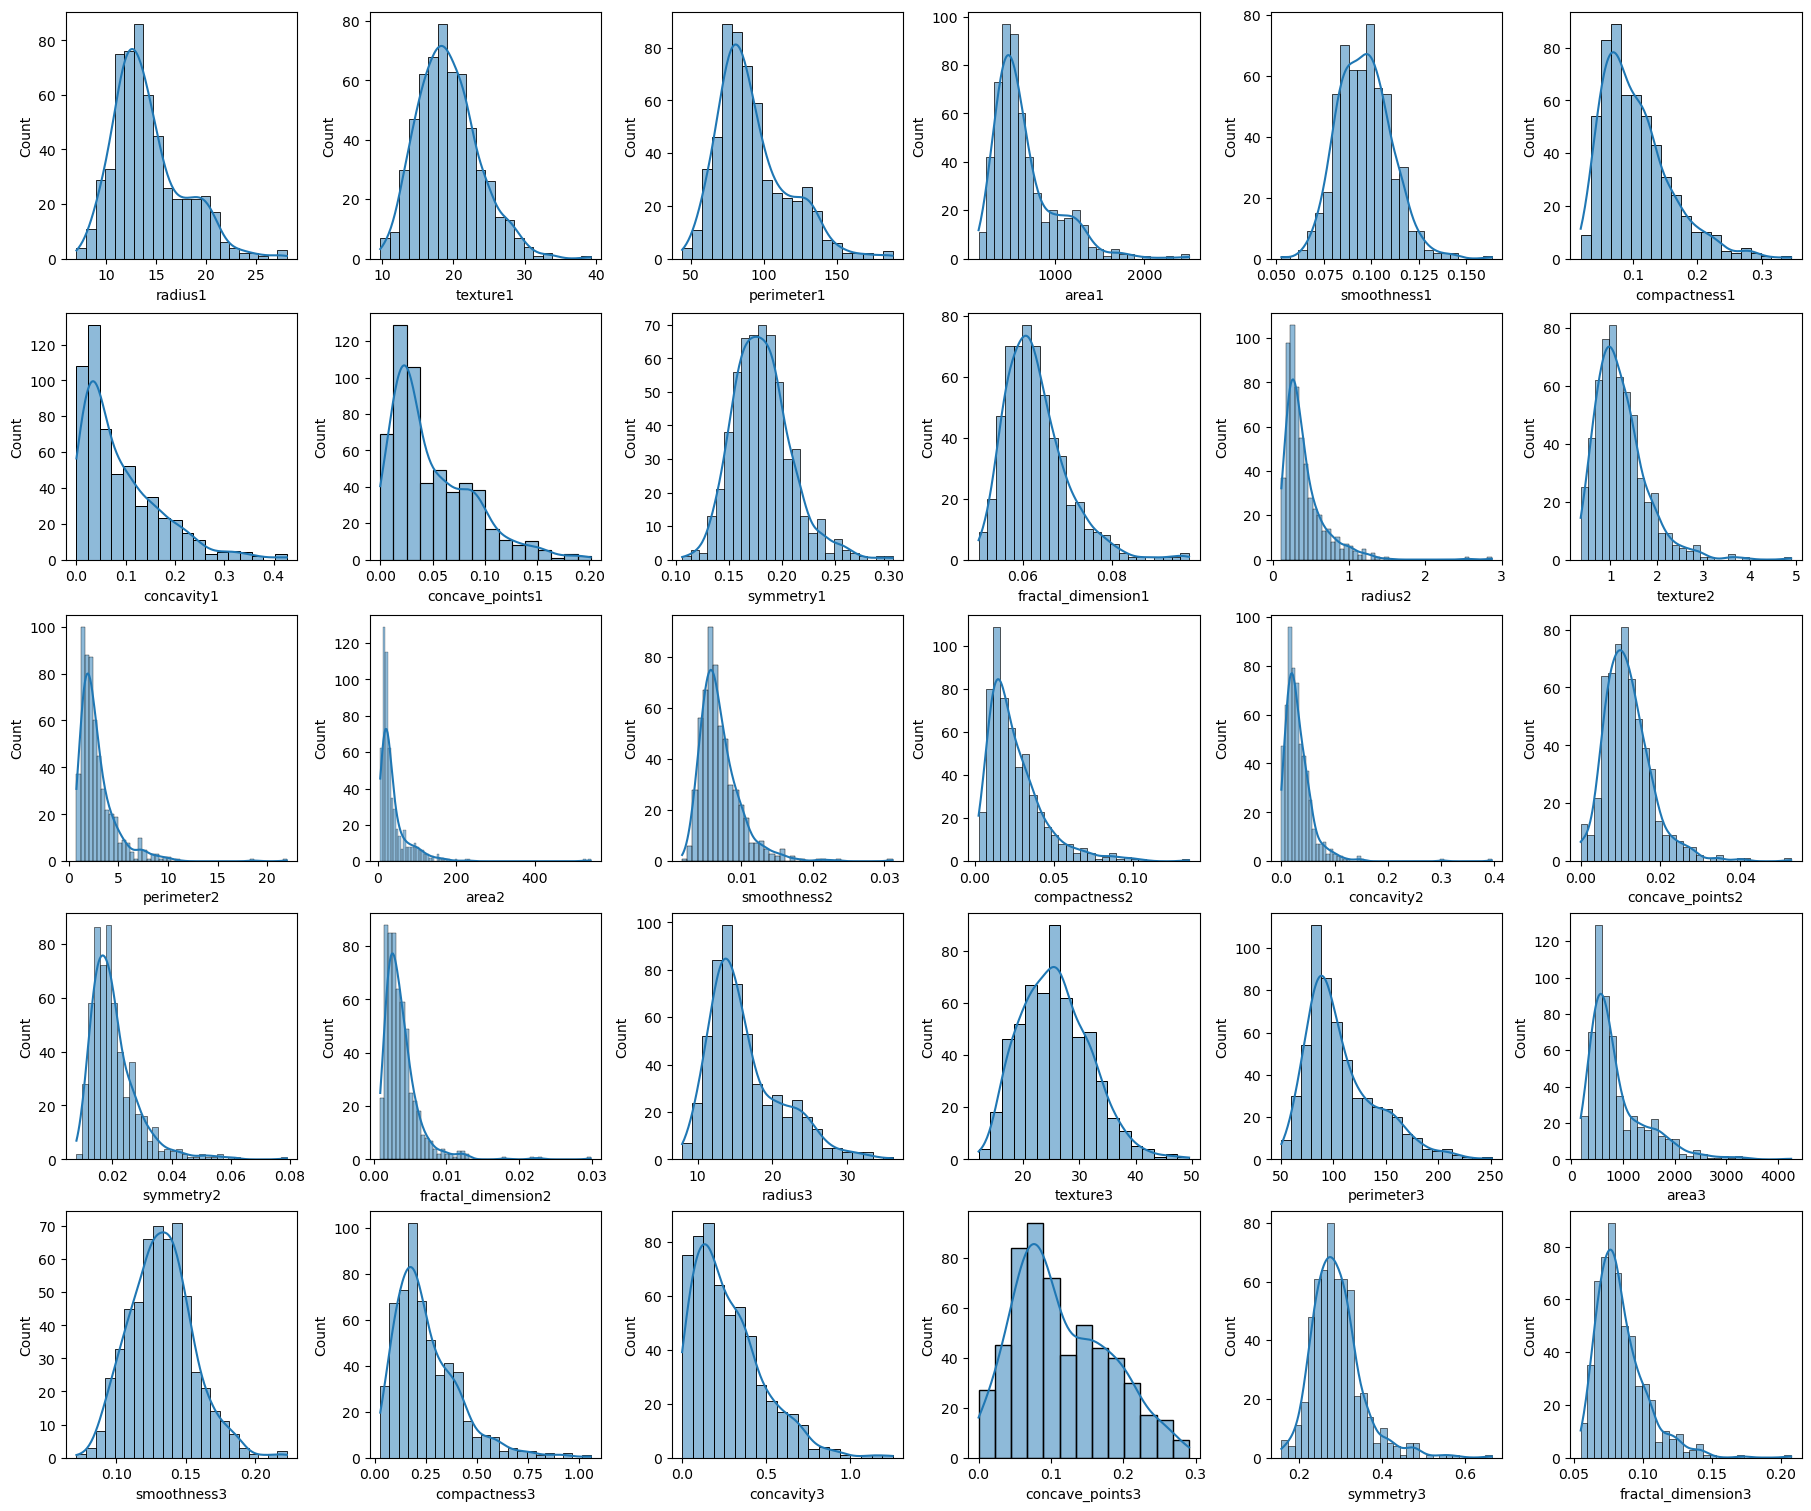

In [46]:
n_vars = X.shape[1]

n_cols = 6
n_rows = n_vars // n_cols + (n_vars % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3), constrained_layout=True)
axes = axes.ravel()

for i, ax in enumerate(axes):
    if i < n_vars:
        sns.histplot(X.iloc[:, i], kde=True, ax=ax)
        ax.set_ylabel('Count')
    else:
        ax.set_visible(False) 

plt.show()

As we can see from this plot, all our variables have unimodal distribution

### Data preparation

In [47]:
# One-hot encoding for target variable
y = pd.get_dummies(y, drop_first=True, dtype='int')  
y

,Diagnosis_M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [48]:
# At first let's make train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# We need to scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building models

In [50]:
from sklearn.model_selection import GridSearchCV

# Logistic regression
log_clf = LogisticRegression()

param_grid =  {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
        'max_iter': [100, 1000, 10000]
}

grid_search = GridSearchCV(estimator=log_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best_log = best_model.predict(X_test)

coefficients = best_model.coef_[0]
intercept = best_model.intercept_[0]

best_params

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}

Grid search didn't increase accuracy

In [51]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best_rf = best_model.predict(X_test)

best_params

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Grid Search increased accuracy by 0.01

In [52]:
# Support Vector Machine
svm_clf = SVC()

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search_svm.fit(X_train, y_train.values.ravel())

best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

y_pred_best_svm = best_model_svm.predict(X_test)

best_params_svm

Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [53]:
# K neighbors Classifier
knn_clf = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train.values.ravel())

best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

y_pred_best_knn = best_model_knn.predict(X_test)

best_params_knn

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'algorithm': 'auto', 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}

Grid Search didn't change accuracy

In [54]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9]
}

grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train.values.ravel())

best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

y_pred_best_gb = best_model_gb.predict(X_test)

best_params_gb

Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

### Assessing Models

In [55]:
from sklearn.metrics import accuracy_score, f1_score

# Assessing models
log_acc = accuracy_score(y_test, y_pred_best_log)
log_f1 = f1_score(y_test, y_pred_best_log)
print(f"Logistic regression: Accuracy = {log_acc}, F1-score = {log_f1}")

rfc_acc = accuracy_score(y_test, y_pred_best_rf)
rfc_f1 = f1_score(y_test, y_pred_best_rf)
print(f"Random Forest Classifier: Accuracy = {rfc_acc}, F1-score = {rfc_f1}")

svm_acc = accuracy_score(y_test, y_pred_best_svm)
svm_f1 = f1_score(y_test, y_pred_best_svm)
print(f"Support Vector Machine: Accuracy = {svm_acc}, F1-score = {svm_f1}")

knn_acc = accuracy_score(y_test, y_pred_best_knn)
knn_f1 = f1_score(y_test, y_pred_best_knn)
print(f"K-nearest Neighbors: Accuracy = {knn_acc}, F1-score = {knn_f1}")

gb_acc = accuracy_score(y_test, y_pred_best_gb)
gb_f1 = f1_score(y_test, y_pred_best_gb)
print(f"Gradient Boosting: Accuracy = {gb_acc}, F1-score = {gb_f1}")

Logistic regression: Accuracy = 0.9824561403508771, F1-score = 0.9763779527559054
Random Forest Classifier: Accuracy = 0.9707602339181286, F1-score = 0.96
Support Vector Machine: Accuracy = 0.9824561403508771, F1-score = 0.976
K-nearest Neighbors: Accuracy = 0.9590643274853801, F1-score = 0.943089430894309
Gradient Boosting: Accuracy = 0.9649122807017544, F1-score = 0.9516129032258064


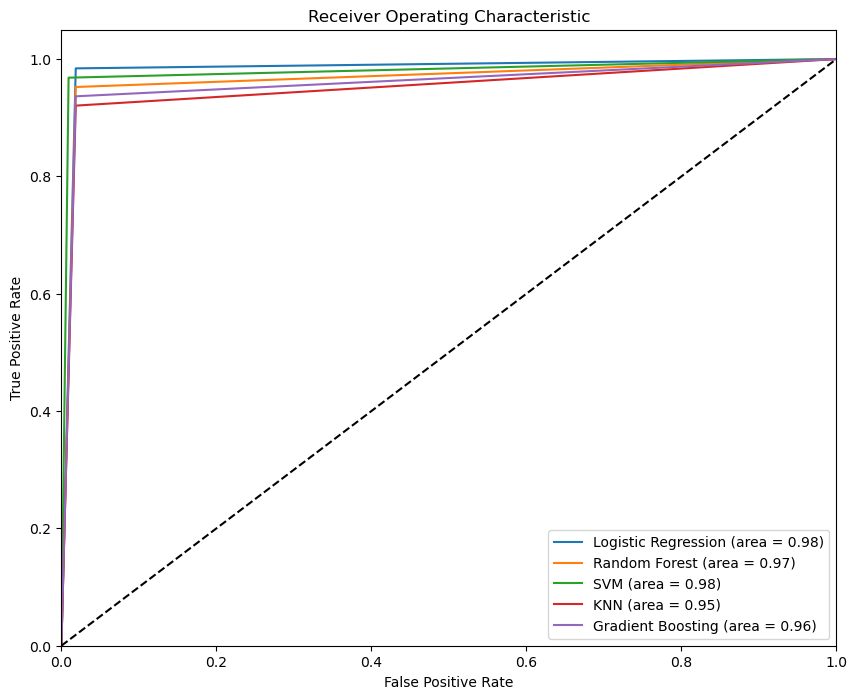

In [61]:
# ROC-AUC graph
from sklearn.metrics import roc_curve, auc

roc_results = []

for model, y_pred in zip(["Logistic Regression", "Random Forest", "SVM", "KNN", "Gradient Boosting"],
                         [y_pred_best_log, y_pred_best_rf, y_pred_best_svm, y_pred_best_knn, y_pred_best_gb]):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_results.append((model, fpr, tpr, roc_auc))

plt.figure(figsize=(10, 8))
for model, fpr, tpr, roc_auc in roc_results:
    plt.plot(fpr, tpr, label=f'{model} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Interpeting results

In [ ]:
print("Intercept:", intercept)
for idx, coef in enumerate(coefficients):
    print(f"Coefficient for {X.columns[idx]}: {coef}")

odds = np.exp(coefficients)

for idx, odd in enumerate(odds):
    print(f"Odds for {X.columns[idx]}: {odd}")